# Data Exploration

In [5]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import numpy as np
import scipy as sc

%matplotlib inline
import os
from os.path import join
from pprint import pprint


In [6]:
d_path = os.path.dirname(os.getcwd())+"\data"
d_file = "taxi-trips.csv"
print(d_path)


C:\Users\EGEMEN\Desktop\NYC-Taxi-Trips-Analysis\data


In [7]:
data = pd.read_csv(join(d_path, d_file))

# 1) Giving basic information regarding the dataset such as shape, data types and descriptive statistics that summarize columns.

In [8]:
# print shape
print('Data Dimensionality: ',data.shape)

Data Dimensionality:  (118185, 11)


In [9]:
# print attribute names
print('Attribute Names: ',data.columns)

Attribute Names:  Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [10]:
# print first 5 rows in your dataset
print('Head of Data: ')
data.head()

Head of Data: 


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [11]:
# print data types of the columns
print('Data types: ',data.dtypes)

Data types:  id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [12]:
data.isnull().sum()  # NaN counts in each column

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [13]:
#Descriptive statistics of taxitrips data
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


# 2) Creating two new columns named ”pickup district” and ”dropoff district” by applying reverse geocoding to associated coordinates.

In [14]:
#Load reverse geocoding
!pip install reverse_geocoder
#Requirement
!pip install msgpack
#Update in case of errors
!python -m pip install --upgrade pip
#Import reverse geocoding libraries
import reverse_geocoder as rg

Requirement already up-to-date: pip in c:\users\egemen\anaconda3\lib\site-packages (19.0.3)


In [15]:
#Reverse geocoding example
long=float((data.loc[5]['pickup_longitude']))
lat=float((data.loc[5]['pickup_latitude']))
coor=(lat,long)
result=rg.search(coor)
result[0]['name']

Loading formatted geocoded file...


'Hoboken'

# Creating column named ”pickup_district”

In [20]:
# Create a list to store the data
pickup=[]
# For each row in the column
for row in range(len(data)):
    #Fetching longitude and latitude values
    long=float(data['pickup_longitude'][row])
    lat=float(data['pickup_latitude'][row])
    coor=(lat,long)
    pickup.append(coor)

In [25]:
#Applying reverse geocoding 
results=rg.search(pickup,mode=2)  

In [34]:
resultstr=[]
for row in range(len(data)):
    resultstr.append(results[row]['name'])

In [35]:
#All pickup districts
print(resultstr)

['Manhattan', 'Long Island City', 'Weehawken', 'Manhattan', 'New York City', 'Hoboken', 'Manhattan', 'Manhattan', 'New York City', 'Long Island City', 'Manhattan', 'New York City', 'Manhattan', 'Manhattan', 'Long Island City', 'Manhattan', 'Manhattan', 'New York City', 'New York City', 'Manhattan', 'Manhattan', 'Weehawken', 'Manhattan', 'Manhattan', 'Manhattan', 'New York City', 'Weehawken', 'Weehawken', 'Manhattan', 'Weehawken', 'New York City', 'Guttenberg', 'Jamaica', 'New York City', 'New York City', 'Manhattan', 'Edgewater', 'New York City', 'Weehawken', 'Weehawken', 'Manhattan', 'Manhattan', 'Weehawken', 'Manhattan', 'Manhattan', 'Manhattan', 'New York City', 'New York City', 'Brooklyn', 'Manhattan', 'Weehawken', 'Manhattan', 'Manhattan', 'Hoboken', 'New York City', 'Weehawken', 'New York City', 'Manhattan', 'Manhattan', 'Manhattan', 'New York City', 'Long Island City', 'Weehawken', 'New York City', 'New York City', 'Long Island City', 'Long Island City', 'Long Island City', 'Lon

In [36]:
# Create a column from the list
data['pickup_district'] = resultstr

In [37]:
data.head(len(data))#display changes

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City


# Creating column named ”dropoff_district”

In [38]:
# Create a list to store the data
dropoff=[]
# For each row in the column
for row in range(len(data)):
    #Fetching longitude and latitude values
    long=float(data['dropoff_longitude'][row])
    lat=float(data['dropoff_latitude'][row])
    coor2=(lat,long)
    dropoff.append(coor2)

In [44]:
#Applying reverse geocoding 
results2=rg.search(dropoff,mode=2) 

In [45]:
resultstr2=[]
for row in range(len(data)):
    resultstr2.append(results2[row]['name'])

In [46]:
#All dropoff districts
print(resultstr2)

['Manhattan', 'Manhattan', 'Manhattan', 'Long Island City', 'New York City', 'New York City', 'Weehawken', 'Manhattan', 'New York City', 'East New York', 'Long Island City', 'Borough of Queens', 'New York City', 'Guttenberg', 'New York City', 'Long Island City', 'New York City', 'New York City', 'The Bronx', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'New York City', 'Edgewater', 'New York City', 'Weehawken', 'New York City', 'Long Island City', 'New York City', 'Manhattan', 'Coney Island', 'New York City', 'Long Island City', 'New York City', 'Inwood', 'New York City', 'New York City', 'Long Island City', 'Long Island City', 'New York City', 'Manhattan', 'Long Island City', 'Manhattan', 'Guttenberg', 'Long Island City', 'New York City', 'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan', 'New York City', 'Weehawken', 'Long Island City', 'New York City', 'New York City', 'Long Island City', 'Manhattan', 'Manhattan', 'New York City', 'New York City', 'Manhattan', 'L

In [47]:
# Create a column from the list
data['dropoff_district'] = resultstr2

In [48]:
data.head(len(data))#display changes

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York


# 3) Extracting the top 5 districts where passengers prefer to leave and arrive

In [49]:
#Extracting top 5 districts for passengers who prefer to leave
df = data.groupby('pickup_district')['id'].nunique()
df= df.sort_values(ascending=False)
df.head(5)

pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: id, dtype: int64

In [50]:
##Extracting top 5 districts for passengers who prefer to arrive
df = data.groupby('dropoff_district')['id'].nunique()
df= df.sort_values(ascending=False)
df.head(5)

dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: id, dtype: int64

# 4) Creating a new column named ”distance” by utilizing pick up and drop off coordinates 


In [51]:
#Loading distance calculator library, geopy
!pip install geopy
# Using geodesic or great_circle function
from geopy.distance import geodesic as geo
#Geopy distance calculation example
long=float(data.loc[5]['pickup_longitude'])
lat=float(data.loc[5]['pickup_latitude'])
coor=(lat,long)
long2=float(data.loc[5]['dropoff_longitude'])
lat2=float(data.loc[5]['dropoff_latitude'])
coor2=(lat2,long2)
result=geo(coor,coor2)
print(data.loc[5]['pickup_district'],data.loc[5]['dropoff_district'],result)

Hoboken New York City 4.000986842424918 km


In [52]:
# Create a list to store the data
distances=[]
# For each row in the column
for row in range(len(data)):
    long=float(data['pickup_longitude'][row])
    lat=float(data['pickup_latitude'][row])
    coor=(lat,long)
    long2=float(data['dropoff_longitude'][row])
    lat2=float(data['dropoff_latitude'][row])
    coor2=(lat2,long2)
    distances.append(geo(coor,coor2))


In [53]:
# Create a column from the list
data['distance'] = distances

In [54]:
data.head(len(data))

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502171836883057 km
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114806749247633 km
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.4950184094038053 km
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.9762785374631702 km
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.5139608816396226 km
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,4.000986842424918 km
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,4.262648202767038 km
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.7284843869260008 km
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,2.2090440333123404 km
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2.9119075823308918 km


# 5) Creating a new column named ”time_of_day” by aggregating timestamps in ”pickup datetime” into 5 different categories.

In [55]:
data['pickup_datetime'][0]

'2016-03-14 17:24:55'

In [56]:
#Converting string type pickup_datetime to date type
data['pickup_datetime']= pd.to_datetime(data['pickup_datetime'])

In [57]:
clock=[]
for row in range(len(data)):
    clk=data['pickup_datetime'][row].hour
    if 7<=clk<9:
        clock.append('rush_hour_morning')
    elif 9<=clk<16:
        clock.append('afternoon')
    elif 16<=clk<18:
        clock.append('rush_hour_evening')
    elif 18<=clk<23:
        clock.append('evening')
    else:#23<=clk<7:
        clock.append('late_night')

In [58]:
# Create a column from the list
data['time_of_day'] = clock

In [59]:
data.head(len(data))

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502171836883057 km,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114806749247633 km,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.4950184094038053 km,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.9762785374631702 km,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.5139608816396226 km,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,4.000986842424918 km,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,4.262648202767038 km,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.7284843869260008 km,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,2.2090440333123404 km,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2.9119075823308918 km,late_night


# 6) Showing how the average distance varies as time of the day changes.

In [60]:
#Loading statistical libraries
import matplotlib.pyplot as plt
import seaborn as sb  # a visualization library based on matplotlib
sb.set(style="darkgrid")

In [81]:
#Converting pandas.core.series.Series object to float
print(type(data['distance'][0]))
print(type(data['distance'][0].km))
dist=[]
for row in range(len(data)):
    dist.append(data['distance'][row].km)
data['distance']=dist
print(type(data['distance'][0]))

<class 'geopy.distance.geodesic'>
<class 'float'>
<class 'numpy.float64'>


In [100]:
#Calculating average distance for each time_of_day
distquery= data.groupby(['time_of_day'],as_index=False)['distance'].mean()
distquery

,time_of_day,distance
0,rush_hour_morning,3.128280
1,afternoon,3.109986
2,rush_hour_evening,3.342814
3,evening,3.378136
4,late_night,4.117635


In [101]:
#Sorting the query table according to time of day
distquery['time_of_day']=pd.Categorical(distquery['time_of_day'],['rush_hour_morning', 'afternoon','rush_hour_evening','evening','late_night' ])
distquery
#No changes so sort
distquery.sort_values(['time_of_day'])

,time_of_day,distance
0,rush_hour_morning,3.128280
1,afternoon,3.109986
2,rush_hour_evening,3.342814
3,evening,3.378136
4,late_night,4.117635


         time_of_day  distance
0  rush_hour_morning  3.128280
1          afternoon  3.109986
2  rush_hour_evening  3.342814
3            evening  3.378136
4         late_night  4.117635


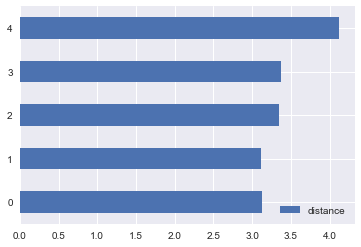

In [147]:
distquery.set_index('time_of_day')
print(distquery)
#Plotting 
distquery.plot(kind='barh')

### Plotting 
distquery.plot(kind='bar')

### Consequently, as time increases until the morning, the distance between pick up point and dropoff point increases too, except the inerval between morning and the afternoon, it decreases at that interval.

# 7) Showing how the trip duration varies as time of the day changes.

In [121]:
#Converting also string type dropoff_datetime to date type to calculate trip duration
data['dropoff_datetime']= pd.to_datetime(data['dropoff_datetime'])
data['dropoff_datetime'][0]-data['pickup_datetime'][0]

Timedelta('0 days 00:07:35')

In [138]:
#Calculating trip duration 
duration=[]
for row in range(len(data)):
    duration.append((data['dropoff_datetime'][row]-data['pickup_datetime'][row]).seconds)

In [141]:
#Adding new column named trip duration
data['trip_duration(sec)']=duration

In [142]:
data#display changes

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,trip_duration(sec)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172,rush_hour_evening,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807,evening,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018,rush_hour_morning,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279,afternoon,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961,afternoon,695
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,4.000987,evening,1561
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,4.262648,evening,1356
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.728484,afternoon,736
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,2.209044,evening,972
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2.911908,late_night,755


In [143]:
#Calculating average duration for each time_of_day
tripquery= data.groupby(['time_of_day'],as_index=False)['trip_duration'].mean()
tripquery

,time_of_day,trip_duration
0,rush_hour_morning,918.488716
1,afternoon,963.922746
2,rush_hour_evening,1024.494552
3,evening,893.595329
4,late_night,866.095457


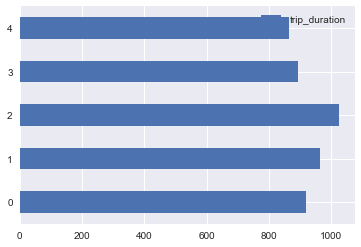

In [144]:
#Plotting 
tripquery.plot(kind='barh')

# Hypothesis Testing

## What is hypothesis testing?

![](https://stepupanalytics.com/wp-content/uploads/2017/06/Hypothesis-Testing-Edited1.jpg)

In an analytical process, we would propose various claims regarding different aspects of the data. Visualization is an important tool to support these claims; however we need statistical tests to show that our claims are sound.

##### Structure of a hypothesis test

- **Null Hypothesis**  
- **Alternative Hypothesis**
- **Statictical Test**
    - Obtaining the test score and p-value
- **Interpreting the results**

In the example above, our null hypothesis $H_0$ is that the mean of 3-points shot attempts are equal in both time period.  
As the alternative hypothesis $H_a$, we proposed that they are different.

Depending on the data set, we need to choose an appropriate significance test. The results obtained from the test help us to determine whether we can reject the null hypothesis or not.

P-value shows how well the sample data support that the null hypothesis is true. Based on different significance levels, $\alpha$, we can reject or fail to reject the null hypothesis. 

If we set $\alpha$ as 0.05, then we can reject the null hypothesis in the example above and state that Golden State Warriors did affect the league.

# 1) Does passenger group size affect the distance?

# Testin Null hypothesis: passenger group size has no effect on the distance.

In [ ]:
# Applying a tdistribution statistical test and show the results

# 2) Do trip distances increase in weekends?

# Testing Null hypothesis: The day of the week has no effect on the distance.

In [ ]:
# Applying a tdistribution statistical test and show the results